Na 4 masinach bolo spustenych P procesov, kazdy z nich vytvoril S socketov, kazdy z nich vytvoril 20 requestov o nahodnej dlzke spravy [0..20] znakov


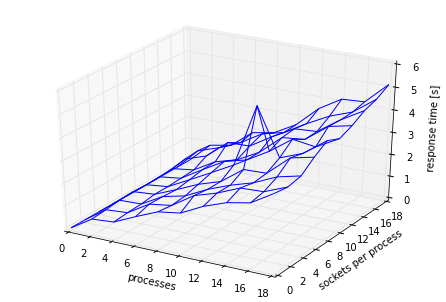

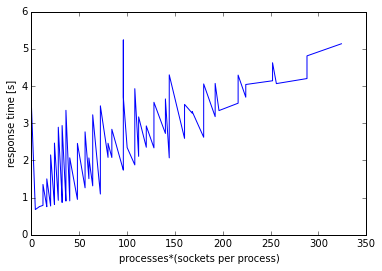

In [36]:
%matplotlib inline
from itertools import repeat
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 

with open('measurement.txt', 'r') as f:
    table = []
    for ps in range(0, 20, 2):
        row = []
        table.append(row)
        for socks in range(0, 20, 2):
            row.append(float(f.readline()))

# map (replicate 10) [0, 2 .. 20]
xs = np.array([list(repeat(float(x), 10)) for x in range(0, 20, 2)])

# replicate 10 [0, 2 .. 20]
ys = np.array(list(repeat([float(x) for x in range(0, 20, 2)], 10)))

arr = np.array(table)

print('Na 4 masinach bolo spustenych P procesov, kazdy z nich vytvoril S socketov, ' +
      'kazdy z nich vytvoril 20 requestov o nahodnej dlzke spravy [0..20] znakov')

fig = plt.figure()
ax = Axes3D(fig)

ax.plot_wireframe(xs, ys, arr)
ax.set_xlabel('processes')
ax.set_ylabel('sockets per process')
ax.set_zlabel('response time [s]')

table = [(t, ps*ss) for (row, ps) in zip(table, range(0, 20, 2))
                    for (t, ss) in zip(row, range(0, 20, 2))]
table.sort(key=lambda x: x[1])

ts, ss_ps = zip(*table) # unzip

plt.figure()
plt.plot(ss_ps, ts)
plt.xlabel('processes*(sockets per process)')
plt.ylabel('response time [s]')

None